# Titanic Data set

# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking for total null values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Cabin, Age and Embarked have null values
#Now fix these columns

### How many Survived?

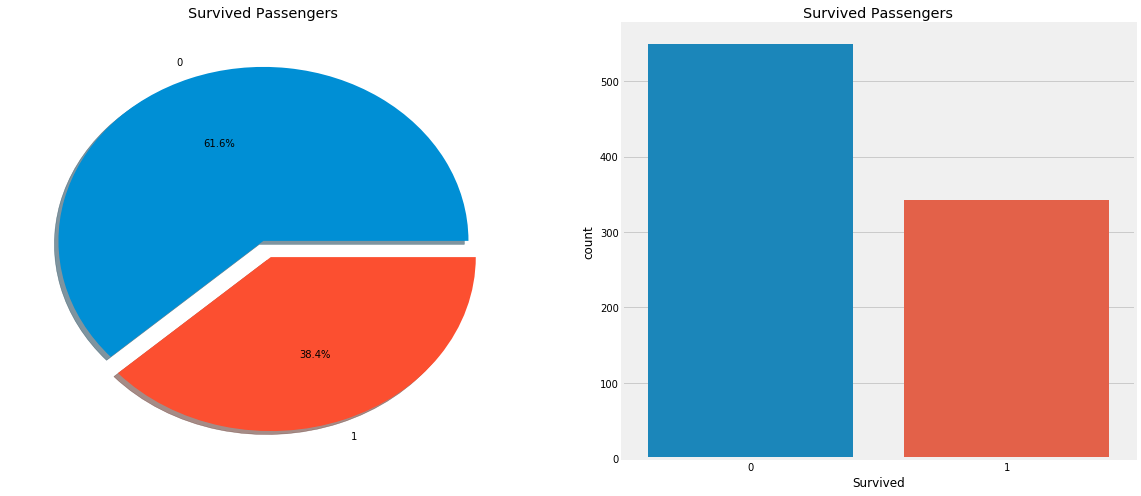

In [7]:
# Lets plot the The total percentage and count of the passengers Survied
#  and died in Titanic using pie and count plot
fig, axes = plt.subplots(1,2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode= [0,0.1],autopct='%1.1f%%', ax =axes[0],shadow=True)
axes[0].set_title('Survived Passengers')
axes[0].set_ylabel('')
sns.countplot('Survived', data= train, ax= axes[1])
axes[1].set_title('Survived Passengers')
plt.show()

From the above Plot we can easily see that very less amount of people survived in the insident.
Only 38 % people survived majority of them died. In the later session we will see that which passenger are survied and do differnt comparisons on different features, i.e. Age, Embarcation, Sex, port etc.

### Categorical Features

In [8]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

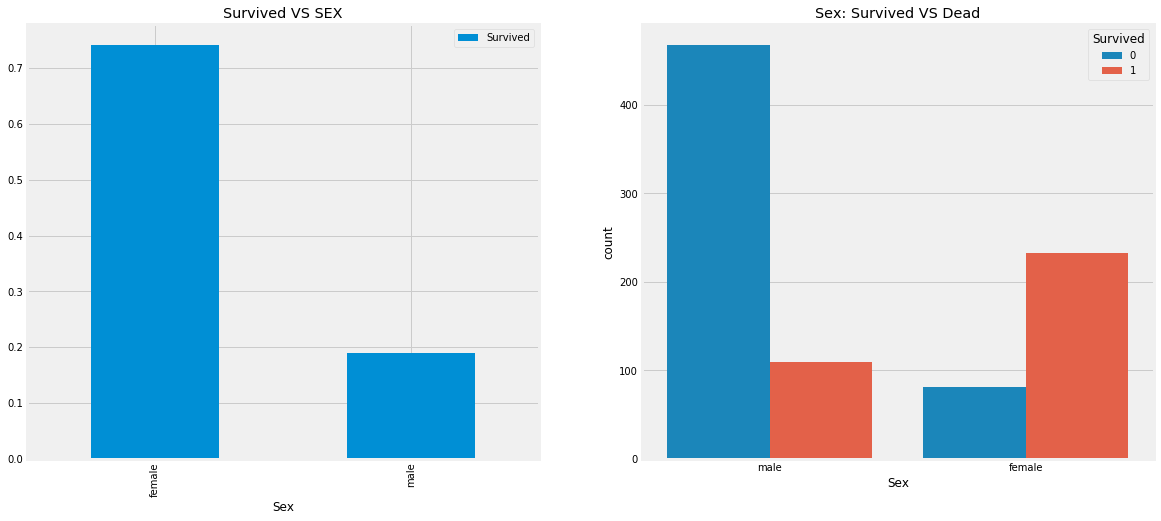

In [11]:
fig, ax = plt.subplots(1,2,figsize= (18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS SEX')
sns.countplot('Sex',hue='Survived', data=train,ax=ax[1])
ax[1].set_title('Sex: Survived VS Dead')
plt.show()

### Ordinal Features

In [13]:
pd.crosstab(train.Pclass,train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


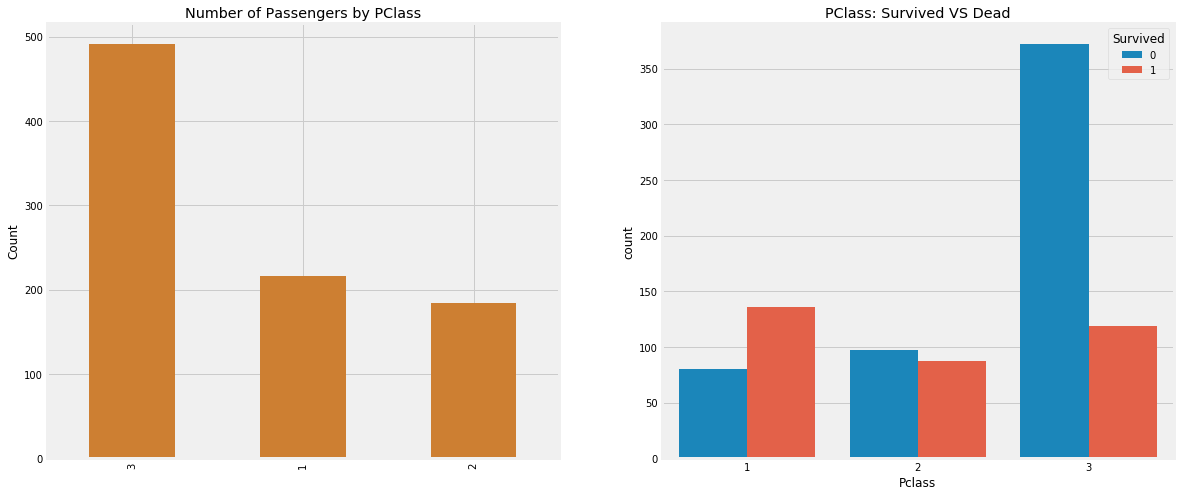

In [20]:
fig , ax = plt.subplots(1,2, figsize = (18,8))
train['Pclass'].value_counts().plot.bar(color= ['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by PClass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = train, ax=ax[1])
ax[1].set_title('PClass: Survived VS Dead')
plt.show()

As we can see clearly from the Plot that the people with Class 1 #tag buisness class have greater survival rate whereas the number of passengers in class  is very less as compared to Third Class.


In [22]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

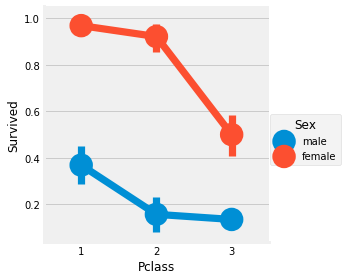

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

 Looking at the Factorplot and CrossTab, we can see that the Survival rate f the womens are grater than the men. The thing to note here is the Survival rate of the women at PClass1 is aroung 96 %.
 It is also evident that in the resue operation womens are given the first pirority. Even men from the PClass1 has a very low Survival rate as compared to PClass1 Women.
    

### Continuous Features

In [27]:
print ('Oldest passenger is:', train['Age'].max(), 'Years old')
print ('Youngest Passenger is: ', train['Age'].min(), 'Years old')
print ('Average age of the people:', train['Age'].mean(), 'Years')

Oldest passenger is: 80.0 Years old
Youngest Passenger is:  0.42 Years old
Average age of the people: 29.69911764705882 Years
